In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/mahdi/Desktop/capstone project/updated_pollution_dataset.csv")  # Replace with your file path

# Display first 5 rows
print(df.head())

# Check basic info (data types, missing values)
print(df.info())

# Summary statistics
print(df.describe())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature

In [37]:
# Check % of missing values per column
missing_percent = df.isnull().mean() * 100
print("Missing Values (%):\n", missing_percent)

# Strategy: Drop columns with >30% missing, impute others
df_clean = df.dropna(thresh=0.7 * len(df), axis=1)  # Drop columns with >30% missing

# Impute numerical columns with median (robust to outliers)
for col in df_clean.select_dtypes(include=['float64', 'int64']):
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Verify no missing values remain
print("\nMissing values after cleaning:\n", df_clean.isnull().sum())

Missing Values (%):
 Temperature                      0.0
Humidity                         0.0
PM2.5                            0.0
PM10                             0.0
NO2                              0.0
SO2                              0.0
CO                               0.0
Proximity_to_Industrial_Areas    0.0
Population_Density               0.0
Air Quality                      0.0
dtype: float64

Missing values after cleaning:
 Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [41]:
# Function to detect outliers and return bounds
def get_outlier_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Get bounds for PM2.5
lower_bound, upper_bound = get_outlier_bounds(df_clean, "PM2.5")

# Cap outliers to bounds
df_clean["PM2.5"] = np.where(
    df_clean["PM2.5"] > upper_bound,
    upper_bound,
    np.where(
        df_clean["PM2.5"] < lower_bound,
        lower_bound,
        df_clean["PM2.5"]
    )
)

# Verify
print(f"PM2.5 after capping: Min={df_clean['PM2.5'].min()}, Max={df_clean['PM2.5'].max()}")



PM2.5 after capping: Min=0.0, Max=58.35


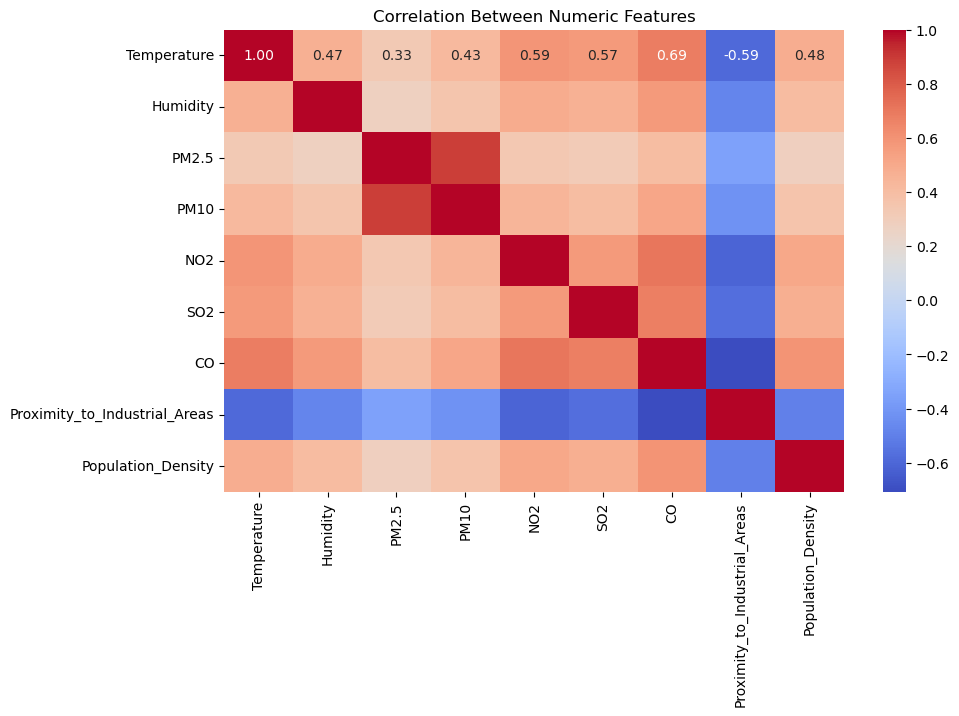

In [43]:
# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Now compute correlation and plot
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

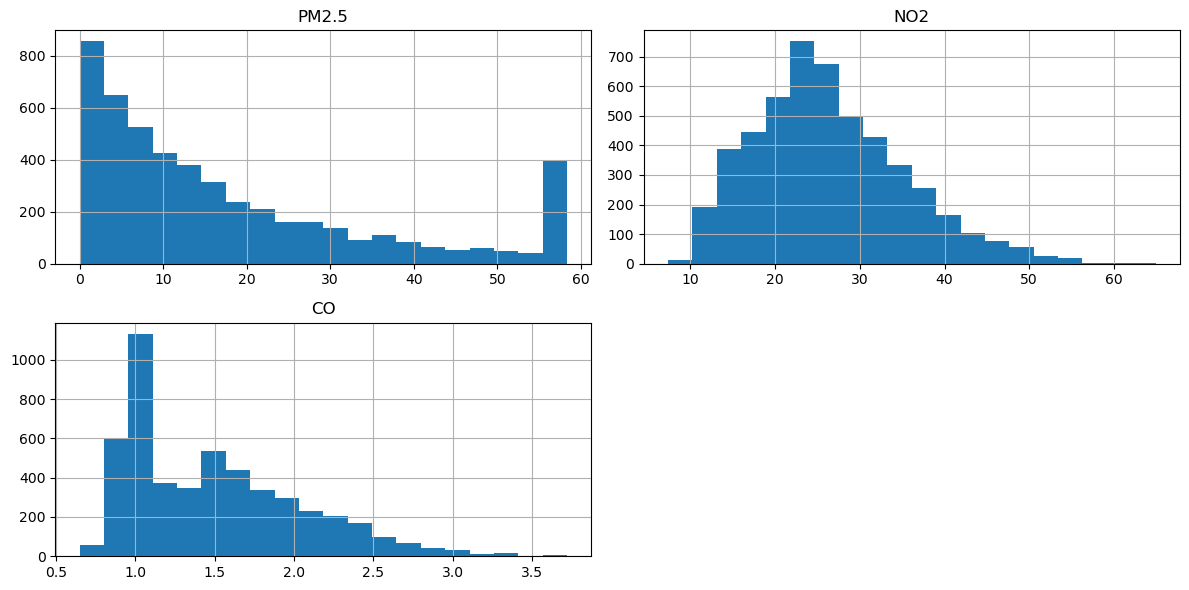

In [45]:
# Plot histograms for pollutants
pollutants = ["PM2.5", "NO2", "CO"]
df_clean[pollutants].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

In [49]:
# Example: Create a "High Pollution" flag
df_clean["High_PM2.5"] = np.where(df_clean["PM2.5"] > 25, 1, 0)  # WHO threshold

# Example: Log-transform skewed features
df_clean["Log_PM2.5"] = np.log1p(df_clean["PM2.5"])

# Save cleaned data
df_clean.to_csv("cleaned_air_quality_data.csv", index=False)

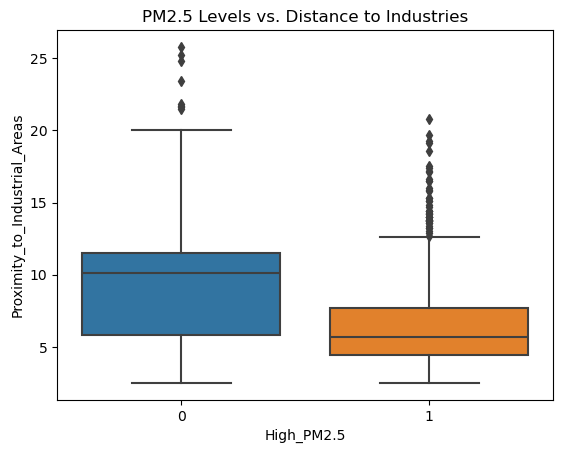

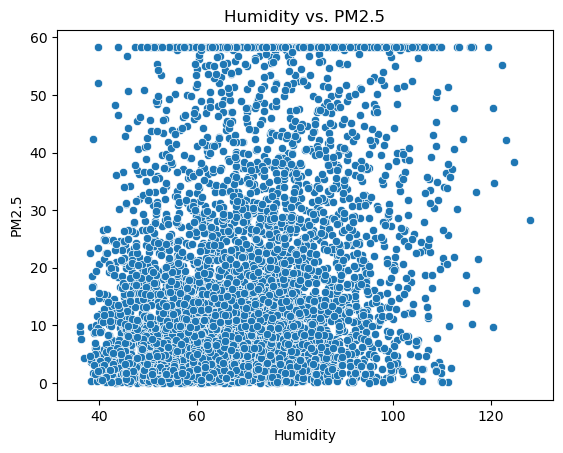

In [53]:
# Q1: Are industrial areas linked to higher pollution?
sns.boxplot(data=df_clean, x="High_PM2.5", y="Proximity_to_Industrial_Areas")
plt.title("PM2.5 Levels vs. Distance to Industries")
plt.show()

# Q2: Does humidity affect PM2.5?
sns.scatterplot(data=df_clean, x="Humidity", y="PM2.5")
plt.title("Humidity vs. PM2.5")
plt.show()